In [1]:
library(tidyverse) ## basics
library(ggpubr) ## combining multiple graphs
library(reshape2) ## melting data to long type
library(scales) ## colorblind pallette
library(RColorBrewer) ## more than 20 color in one palette
library(readxl) ## read excel
library(ggsignif) ## show signif stars

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    dis

## Diversity similarity to donor

In [2]:
# load metadata
metadata <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/metadata.tsv", sep='\t')

# load alpha diversity
shannon <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/shannon_tabulated.tsv", sep='\t')
faith <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/faith_pd_tabulated.tsv", sep='\t')
asv <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/observed_features_tabulated.tsv", sep='\t')
chao1 <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/chao1_tabulated.tsv", sep='\t')

# rename SampleID column
shannon <- rename(shannon, SampleID=X)
faith <- rename(faith, SampleID=X)
asv <- rename(asv, SampleID=X)
chao1 <- rename(chao1, SampleID=X)

# merge alpha diversity with metadata
metadata <- merge(metadata,shannon, by = c("SampleID"))
metadata <- merge(metadata,chao1, by = c("SampleID"))
metadata <- merge(metadata,asv, by = c("SampleID"))
metadata <- merge(metadata,faith, by = c("SampleID"))

# load beta diversity
bray <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/bray_curtis_similarity_FMT.tsv", sep='\t')
jacc <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/jaccard_similarity_FMT.tsv", sep='\t')
uuni <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/unweighted_unifrac_similarity_FMT.tsv", sep='\t')
wuni <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/weighted_unifrac_similarity_FMT.tsv", sep='\t')

# merge beta diversity with metadata
beta <- merge(bray, jacc, by="recipient")
beta <- select(beta, -donor.y)
beta <- merge(beta, uuni, by="recipient")
beta <- select(beta, -donor)
beta <- merge(beta, wuni, by="recipient")
beta <- select(beta, -donor)
beta <- rename(beta, donor=donor.x)
beta <- merge(beta, metadata, by.x="recipient", by.y="SampleID")
#beta <- filter(beta, Genotype!="KO_IL17")


#### Alpha diversity

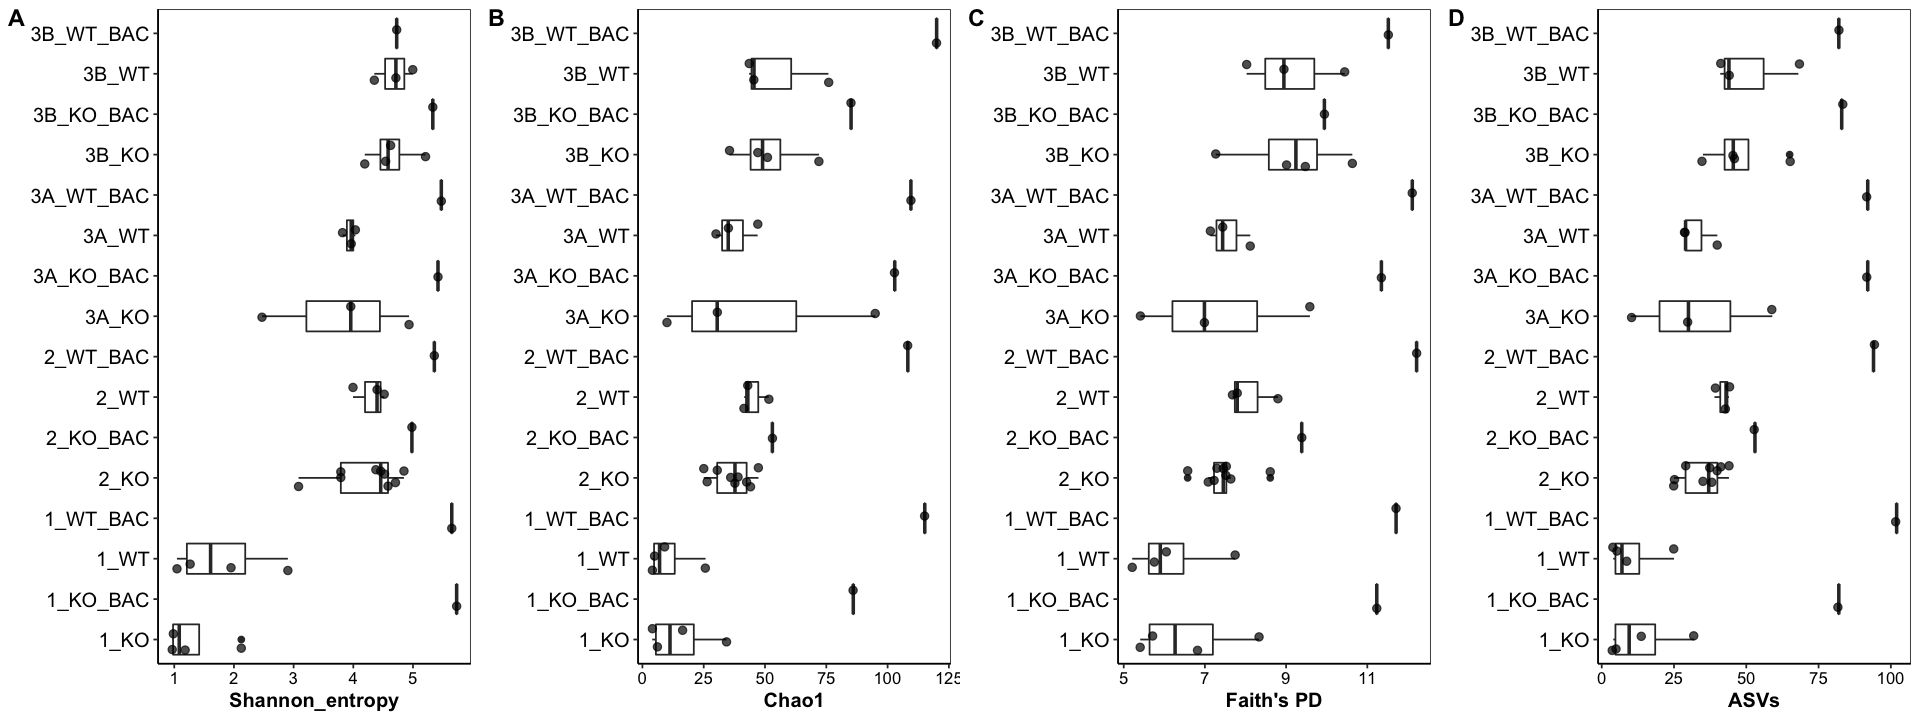

In [3]:
## plot beta similarity to donor
options(repr.plot.width=16, repr.plot.height=6)

# shannon
plt_shannon <- ggplot(data=metadata, aes(x=shannon_entropy, y=FMT_batch_type))+
  geom_boxplot()+
  geom_jitter(color="black", size=2, alpha=0.7, height=0.3)+
  labs(x="Shannon_entropy", y='')+
  theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"), 
        axis.text.y = element_text(size = 12, colour = "black"), 
        axis.text.x = element_text(size = 10, colour = "black"),
        axis.title.x = element_text(size = 12, face="bold"))

# chao1
plt_chao1 <- ggplot(data=metadata, aes(x=chao1, y=FMT_batch_type))+
  geom_boxplot()+
  geom_jitter(color="black", size=2, alpha=0.7, height=0.3)+
  labs(x="Chao1", y='')+
  theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"), 
        axis.text.y = element_text(size = 12, colour = "black"), 
        axis.text.x = element_text(size = 10, colour = "black"),
        axis.title.x = element_text(size = 12, face="bold"))

# shannon
plt_faith <- ggplot(data=metadata, aes(x=faith_pd, y=FMT_batch_type))+
  geom_boxplot()+
  geom_jitter(color="black", size=2, alpha=0.7, height=0.3)+
  labs(x="Faith's PD", y='')+
  theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"), 
        axis.text.y = element_text(size = 12, colour = "black"), 
        axis.text.x = element_text(size = 10, colour = "black"),
        axis.title.x = element_text(size = 12, face="bold"))

# shannon
plt_asv <- ggplot(data=metadata, aes(x=observed_features, y=FMT_batch_type))+
  geom_boxplot()+
  geom_jitter(color="black", size=2, alpha=0.7, height=0.3)+
  labs(x="ASVs", y='')+
  theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"), 
        axis.text.y = element_text(size = 12, colour = "black"), 
        axis.text.x = element_text(size = 10, colour = "black"),
        axis.title.x = element_text(size = 12, face="bold"))

# combine plots to one figure
plt_alpha_similarity <- ggarrange(plt_shannon, plt_chao1, plt_faith, plt_asv, 
                            ncol = 4, nrow = 1, labels = c('A', 'B', 'C', 'D'))
plt_alpha_similarity

#### Beta diversity

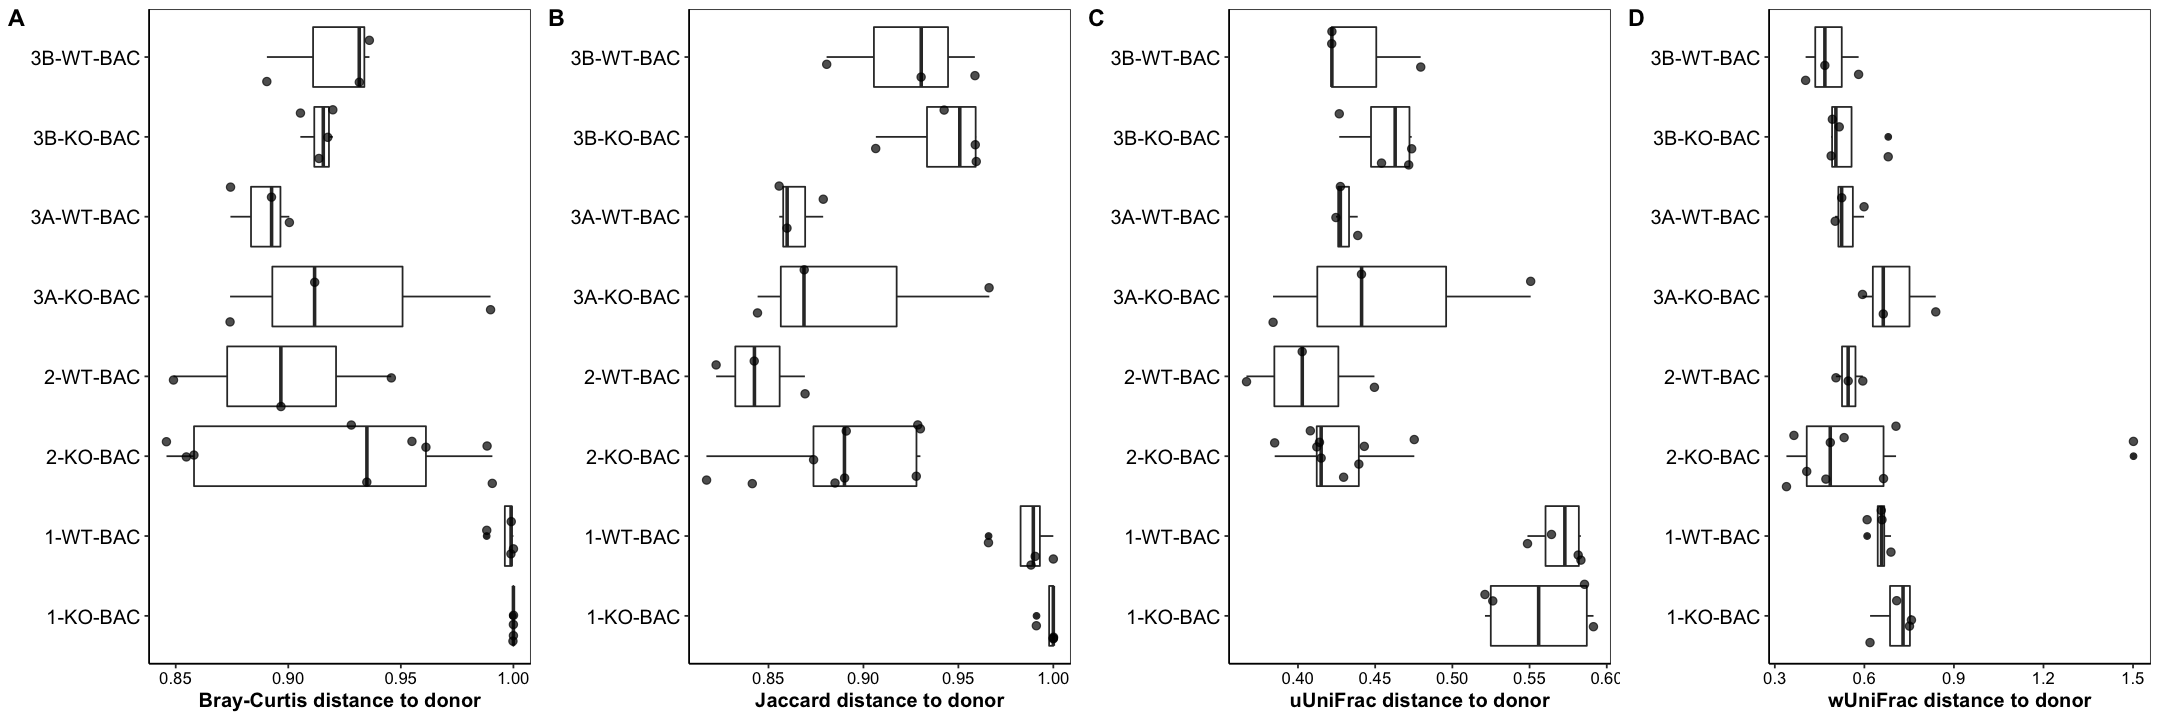

In [4]:
## plot beta similarity to donor
options(repr.plot.width=18, repr.plot.height=6)

# bray
plt_bray_sim <- ggplot(data=beta, aes(x=similarity_bray, y=donor))+
  geom_boxplot()+
  geom_jitter(color="black", size=2, alpha=0.7)+
  labs(x="Bray-Curtis distance to donor", y='')+
  theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"), legend.position="none", 
        axis.text.y = element_text(size = 12, colour = "black"), 
        axis.text.x = element_text(size = 10, colour = "black"),
        axis.title.x = element_text(size = 12, face="bold"))
# jacc
plt_jacc_sim <- ggplot(data=beta, aes(x=similarity_jacc, y=donor))+
  geom_boxplot()+
  geom_jitter(color="black", size=2, alpha=0.7)+
  labs(x="Jaccard distance to donor", y='')+
  theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"), legend.position="none",
        axis.text.y = element_text(size = 12, colour = "black"), 
        axis.text.x = element_text(size = 10, colour = "black"),
        axis.title.x = element_text(size = 12, face="bold"))
# uuni
plt_uuni_sim <- ggplot(data=beta, aes(x=similarity_uuni, y=donor))+
  geom_boxplot()+
  geom_jitter(color="black", size=2, alpha=0.7)+
  labs(x="uUniFrac distance to donor", y='')+
  theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"), legend.position="none",
        axis.text.y = element_text(size = 12, colour = "black"), 
        axis.text.x = element_text(size = 10, colour = "black"),
        axis.title.x = element_text(size = 12, face="bold"))
# wuni
plt_wuni_sim <- ggplot(data=beta, aes(x=similarity_wuni, y=donor))+
  geom_boxplot()+
  geom_jitter(color="black", size=2, alpha=0.7)+
  labs(x="wUniFrac distance to donor", y='')+
  theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"), legend.position="none",
        axis.text.y = element_text(size = 12, colour = "black"), 
        axis.text.x = element_text(size = 10, colour = "black"),
        axis.title.x = element_text(size = 12, face="bold"))

# combine plots to one figure
plt_beta_similarity <- ggarrange(plt_bray_sim, plt_jacc_sim, plt_uuni_sim, plt_wuni_sim, 
                            ncol = 4, nrow = 1, labels = c('A', 'B', 'C', 'D'))
plt_beta_similarity

#png(filename = "/Users/dagmarschierova/MEGA/IMG/study_5_revisions/Figures/beta_similarity.png", 
#    res=300, width=4500, height=1200, bg="transparent")
#plot(plt_beta_similarity)
#dev.off()

##### Supplementary Figure:
In this figure we show distance to donor measured by 4 different distance metrics (Bray-Curtis, Jaccard, unweighted UniFrac, weighted UniFrac). We included distance metrics which take phylogeny into account (weighted and unweighted UniFrac) or which take AVS abundance into account (Bray-Curtis, weighted Unifrac). Recipients' stool from the first FMT batch is not very similar to the donor when we do not consider phylogeny. However, when we consider both phylogeny and abundance, all recipients the share similar degree of similarity to donors.

*side note to explain:<br />
The lower the Unifrac the more dissimilar the samples are.<br />
The lower the Bray-Curtis/Jaccard the more dissimilar the samples are.*

In [5]:
# filter groups by donor
beta_iko <- filter(beta, donor=="1-KO-BAC")
beta_iwt <- filter(beta, donor=="1-WT-BAC")
beta_iiko <- filter(beta, donor=="2-KO-BAC")
beta_iiwt <- filter(beta, donor=="2-WT-BAC")
beta_iiiako <- filter(beta, donor=="3A-KO-BAC")
beta_iiiawt <- filter(beta, donor=="3A-WT-BAC")
beta_iiibko <- filter(beta, donor=="3B-KO-BAC")
beta_iiibwt <- filter(beta, donor=="3B-WT-BAC")

In [6]:
# test WT KO pairs for different distance to donor
wilcox.test(beta_iko$similarity_bray, beta_iwt$similarity_bray)
wilcox.test(beta_iiko$similarity_bray, beta_iiwt$similarity_bray)
wilcox.test(beta_iiiako$similarity_bray, beta_iiiawt$similarity_bray)
wilcox.test(beta_iiibko$similarity_bray, beta_iiibwt$similarity_bray)

Warning message in wilcox.test.default(beta_iko$similarity_bray, beta_iwt$similarity_bray):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  beta_iko$similarity_bray and beta_iwt$similarity_bray
W = 13.5, p-value = 0.1241
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  beta_iiko$similarity_bray and beta_iiwt$similarity_bray
W = 18, p-value = 0.4818
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  beta_iiiako$similarity_bray and beta_iiiawt$similarity_bray
W = 6, p-value = 0.7
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  beta_iiibko$similarity_bray and beta_iiibwt$similarity_bray
W = 4, p-value = 0.6286
alternative hypothesis: true location shift is not equal to 0


pdf 
  2

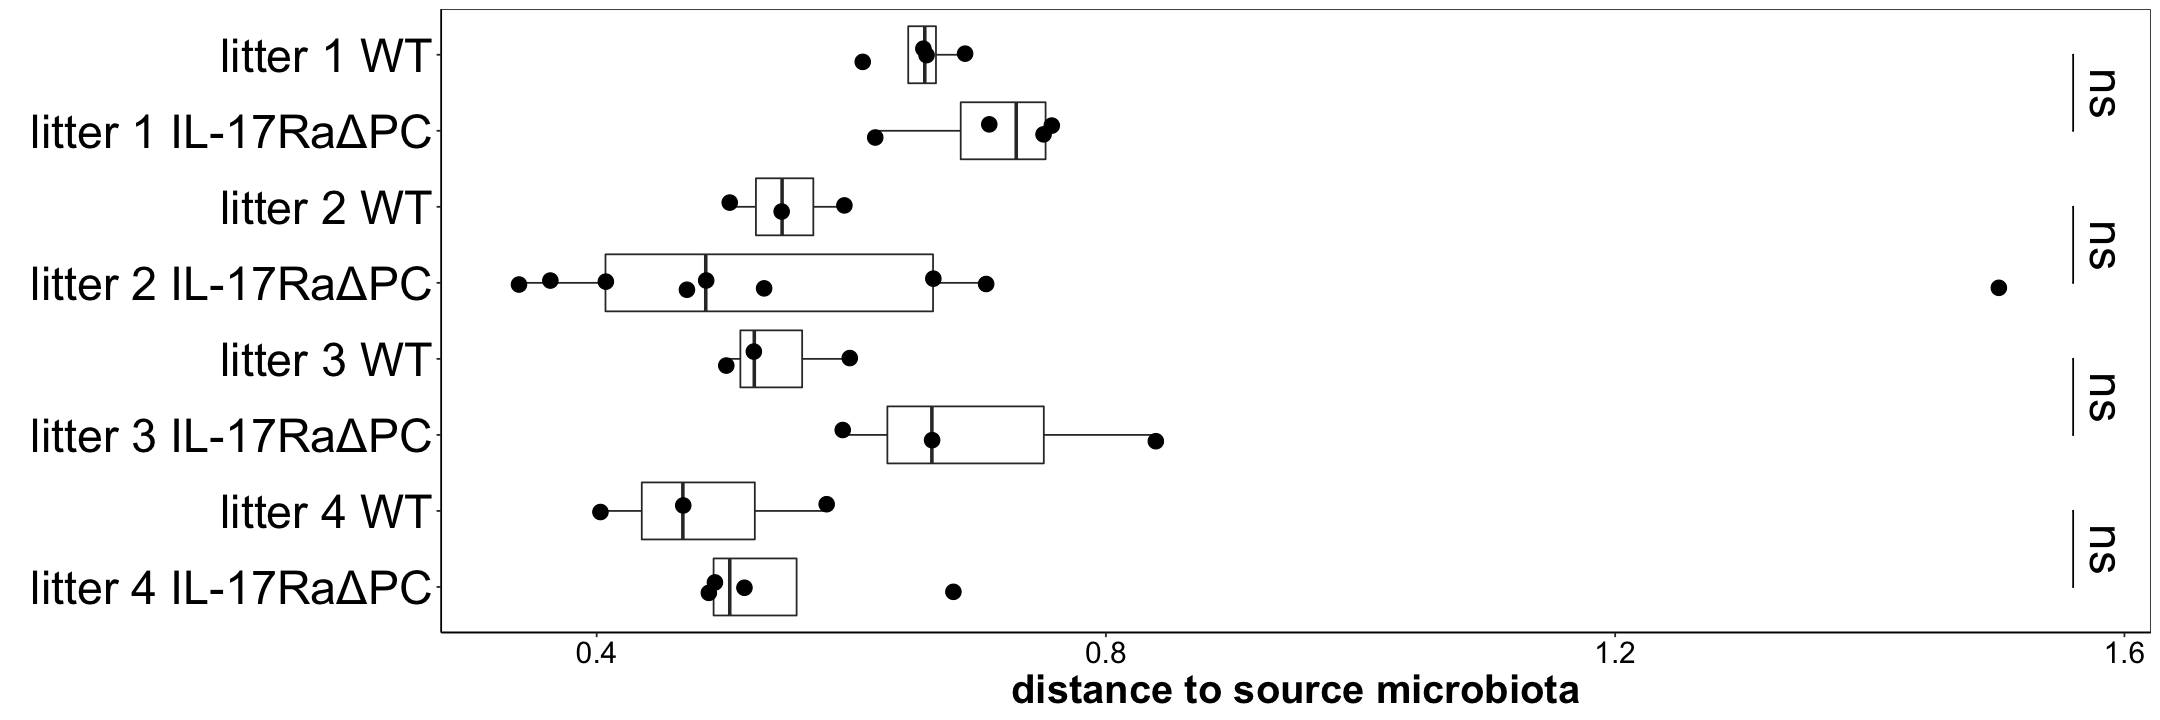

In [7]:
options(warn=-1)
plt_wuni_sim <- ggplot(data=beta, aes(x=similarity_wuni, y=donor))+
  geom_boxplot(outlier.shape = NA)+
  geom_jitter(color="black", size=4, height=0.1)+
  labs(x="distance to source microbiota", y='')+
  geom_signif(comparisons=list(c("1-KO-BAC","1-WT-BAC")), annotations="ns", textsize=10, tip_length=0)+
  geom_signif(comparisons=list(c("2-KO-BAC","2-WT-BAC")), annotations="ns", textsize=10, tip_length=0)+
  geom_signif(comparisons=list(c("3A-KO-BAC","3A-WT-BAC")), annotations="ns", textsize=10, tip_length=0)+
  geom_signif(comparisons=list(c("3B-KO-BAC","3B-WT-BAC")), annotations="ns", textsize=10, tip_length=0)+
  scale_y_discrete(limits=c("3B-KO-BAC","3B-WT-BAC","3A-KO-BAC","3A-WT-BAC", 
                            "2-KO-BAC","2-WT-BAC","1-KO-BAC","1-WT-BAC"),
                   labels=c("1-KO-BAC"="litter 1 IL-17RaΔPC","1-WT-BAC"="litter 1 WT", 
                            "2-KO-BAC"="litter 2 IL-17RaΔPC","2-WT-BAC"="litter 2 WT",
                            "3A-KO-BAC"="litter 3 IL-17RaΔPC","3A-WT-BAC"="litter 3 WT",
                            "3B-KO-BAC"="litter 4 IL-17RaΔPC","3B-WT-BAC"="litter 4 WT"))+
  theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"), legend.position="none",
        axis.text.x = element_text(size = 18, colour = "black"), 
        axis.text.y = element_text(size = 28, colour = "black"),
        axis.title.x = element_text(size = 24, face="bold"))

plt_wuni_sim

png(filename = "/Users/dagmarschierova/MEGA/IMG/study_5_revisions/Figures/wuni_similarity_donor.png", 
    res=300, width=3500, height=2500, bg="transparent")
plot(plt_wuni_sim)
dev.off()
options(warn=0)

## Taxonomical similarity to donor

In [8]:
# load taxonomy
tax <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/taxonomy_raref_1192/taxonomy-L6-rel-similarity2.tsv", 
                   sep='\t', header=TRUE)

# select only taxa with abundance over 5%
tax <- select_if(tax, ~any(. > 0.05))

# convert to long data type
tax_long <- melt(tax, id = c("sample"))

# create new column identifying FMT source
tax_long["FMT_source"] <- substr(tax_long$sample, 1, 4)


#### Plot recipient and donor pairs

pdf 
  2

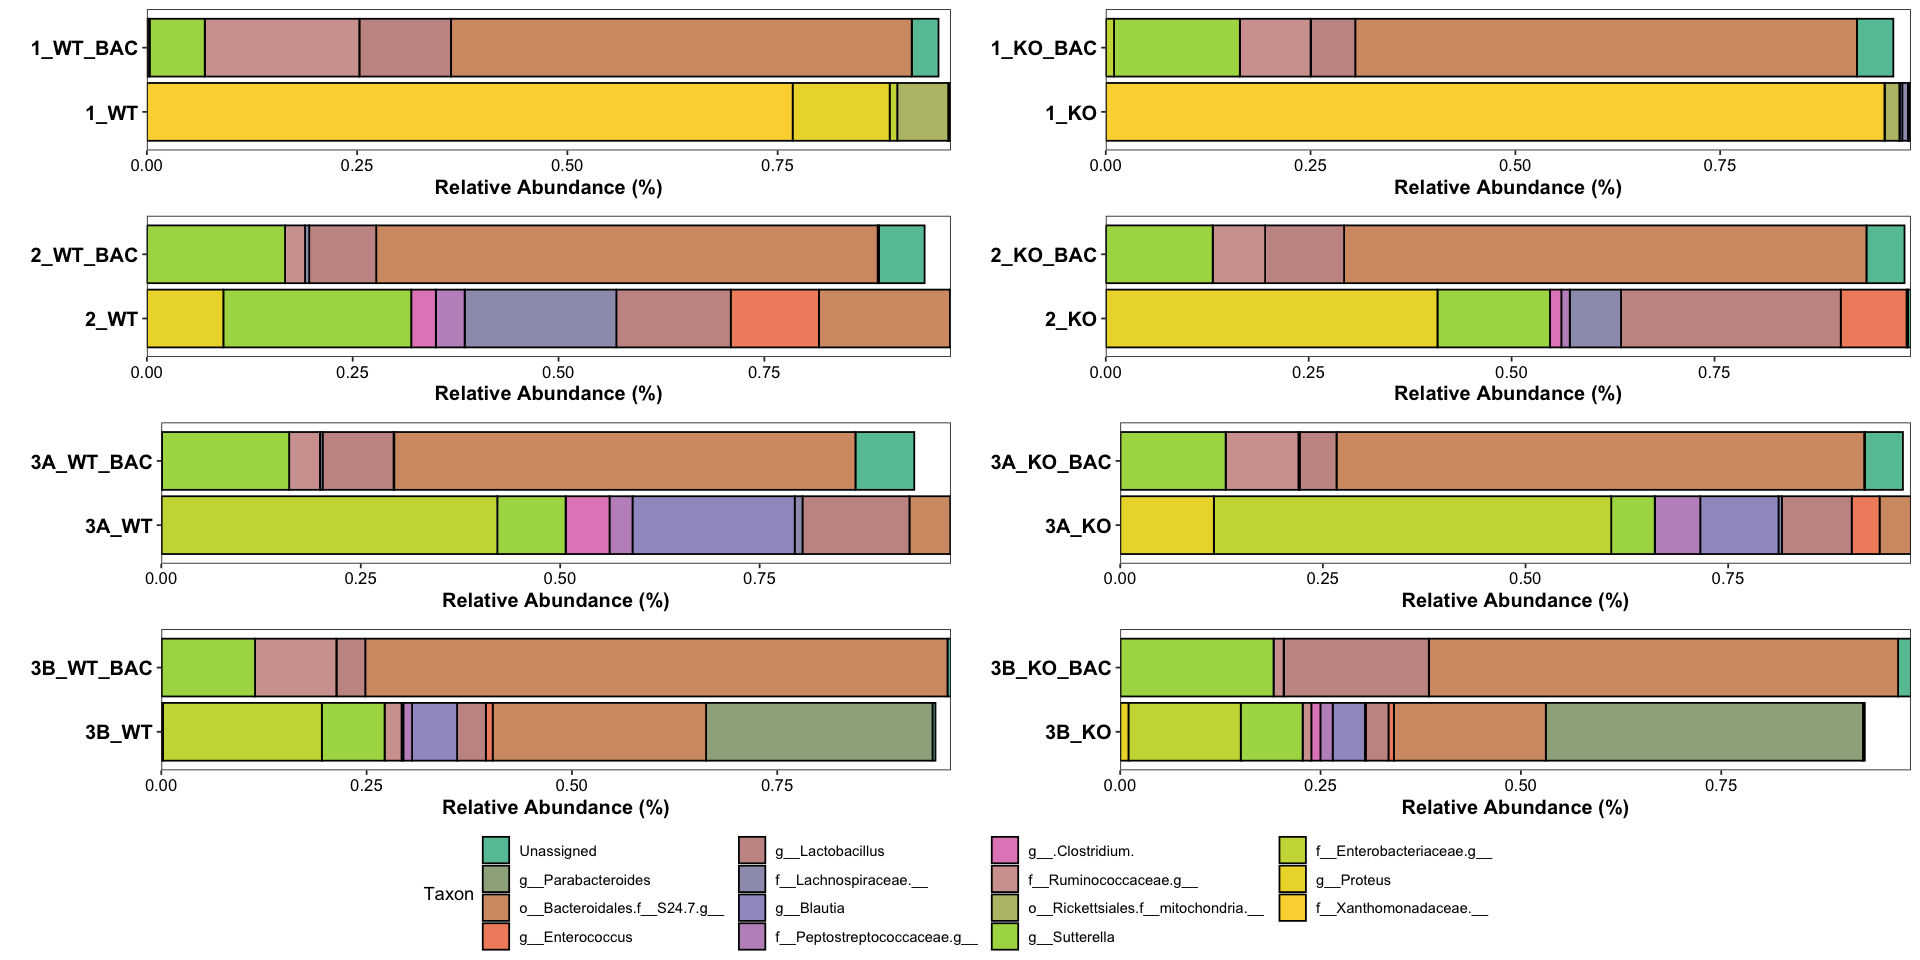

In [9]:
# plot mean recipients + donor

options(repr.plot.width=16, repr.plot.height=8)
tax_long_aux <- tax_long

for (source in unique(tax_long_aux$FMT_source))
{
tax_long <- filter(tax_long_aux, tax_long_aux$FMT_source == source)

#create plot for each donor
plot <- ggplot(data=tax_long, aes(x=value, fill=variable, y=sample)) + 
    geom_bar(stat = "identity", colour = "black") +
    theme_bw()+
    theme(axis.text.y = element_text(size = 12, colour = "black", face="bold"), 
          axis.text.x = element_text(size = 10, colour = "black"),
          axis.title.x = element_text(size = 12, face="bold"),
          panel.grid = element_blank()) +
    scale_fill_manual(values = colorRampPalette(brewer.pal(8, "Set2"))(20)) +
    scale_x_continuous(expand = c(0,0)) +
    labs(x = "Relative Abundance (%)", y = "", fill = "Taxon", size=20) +
    guides(fill=guide_legend(ncol=4))

assign(paste0("plot_", source), plot)
}

#combine plot from all donors
plt_tax_similarity <- ggarrange(plot_1_WT, plot_1_KO, plot_2_WT, plot_2_KO, plot_3A_W, plot_3A_K, plot_3B_W, plot_3B_K,
                            ncol = 2, nrow = 4, common.legend = TRUE, legend="bottom")
plt_tax_similarity

# save plot
png(filename = "/Users/dagmarschierova/MEGA/IMG/study_5_revisions/Figures/tax_similarity.png", 
    res=300, width=8000, height=4000, bg="transparent")
plot(plt_tax_similarity)
dev.off()

### Beta diversity similarity across donors

In [10]:
# load summary data
bray <- read_excel("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/bray_curtis_similarity.xlsx")
bray <- rename(bray, SampleID="...1")
bray <- as.data.frame(bray)
wuni <- read_excel("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/weighted_unifrac_similarity.xlsx")
wuni <- rename(wuni, SampleID="...1")
wuni <- as.data.frame(wuni)

# load metadata
metadata <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/metadata.tsv", sep='\t')

# merge
bray <- merge(bray, metadata, by = c("SampleID"))
bray <- filter(bray, Genotype!="KO_IL17")
wuni <- merge(wuni, metadata, by = c("SampleID"))
wuni <- filter(wuni, Genotype!="KO_IL17")

New names:
* `` -> ...1

New names:
* `` -> ...1



In [11]:
# convert to long data type
bray_long <- melt(bray, id = c("SampleID"))
bray_long$value <- as.numeric(bray_long$value)
wuni_long <- melt(wuni, id = c("SampleID"))
wuni_long$value <- as.numeric(wuni_long$value)

# filter by donor
I_KO <- filter(bray_long, variable=='I-KO-BAC')
I_KO <- merge(I_KO,metadata, by = c("SampleID"))
I_WT <- filter(bray_long, variable=='I-WT-BAC')
I_WT <- merge(I_WT,metadata, by = c("SampleID"))

II_KO <- filter(bray_long, variable=='II-KO-BAC')
II_KO <- merge(II_KO,metadata, by = c("SampleID"))
II_WT <- filter(bray_long, variable=='II-WT-BAC')
II_WT <- merge(II_WT,metadata, by = c("SampleID"))

IIIA_KO <- filter(bray_long, variable=='IIIA-KO-BAC')
IIIA_KO <- merge(IIIA_KO,metadata, by = c("SampleID"))
IIIA_WT <- filter(bray_long, variable=='IIIA-WT-BAC')
IIIA_WT <- merge(IIIA_WT,metadata, by = c("SampleID"))

IIIB_KO <- filter(bray_long, variable=='IIIB-KO-BAC')
IIIB_KO <- merge(IIIB_KO,metadata, by = c("SampleID"))
IIIB_WT <- filter(bray_long, variable=='IIIB-WT-BAC')
IIIB_WT <- merge(IIIB_WT,metadata, by = c("SampleID"))

I_KOw <- filter(wuni_long, variable=='I-KO-BAC')
I_KOw <- merge(I_KOw,metadata, by = c("SampleID"))
I_WTw <- filter(wuni_long, variable=='I-WT-BAC')
I_WTw <- merge(I_WTw,metadata, by = c("SampleID"))

II_KOw <- filter(wuni_long, variable=='II-KO-BAC')
II_KOw <- merge(II_KOw,metadata, by = c("SampleID"))
II_WTw <- filter(wuni_long, variable=='II-WT-BAC')
II_WTw <- merge(II_WTw,metadata, by = c("SampleID"))

IIIA_KOw <- filter(wuni_long, variable=='IIIA-KO-BAC')
IIIA_KOw <- merge(IIIA_KOw,metadata, by = c("SampleID"))
IIIA_WTw <- filter(wuni_long, variable=='IIIA-WT-BAC')
IIIA_WTw <- merge(IIIA_WTw,metadata, by = c("SampleID"))

IIIB_KOw <- filter(wuni_long, variable=='IIIB-KO-BAC')
IIIB_KOw <- merge(IIIB_KOw,metadata, by = c("SampleID"))
IIIB_WTw <- filter(wuni_long, variable=='IIIB-WT-BAC')
IIIB_WTw <- merge(IIIB_WTw,metadata, by = c("SampleID"))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



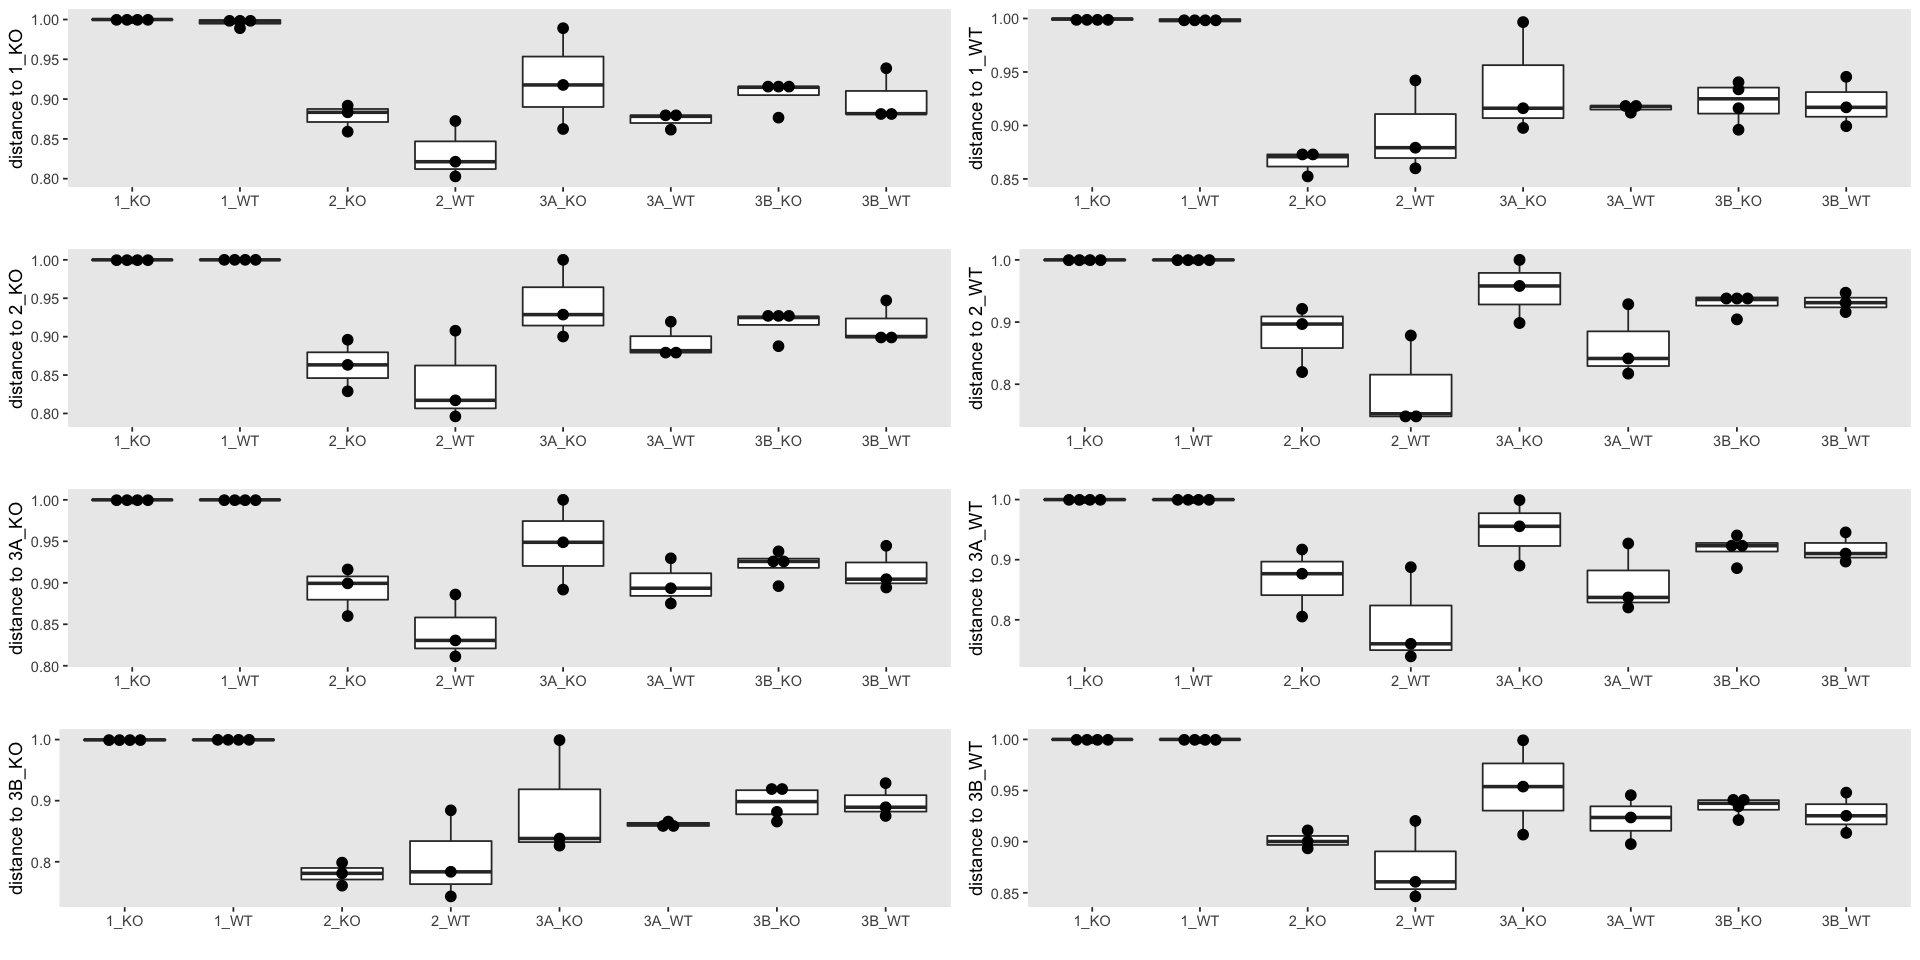

In [12]:
options(repr.plot.width=16, repr.plot.height=8)

iko <- ggplot(I_KO, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to 1_KO") +
  theme(legend.position="none", panel.grid=element_blank())

iwt <- ggplot(I_WT, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to 1_WT") +
  theme(legend.position="none", panel.grid=element_blank())

iiko <- ggplot(II_KO, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to 2_KO") +
  theme(legend.position="none", panel.grid=element_blank())

iiwt <- ggplot(II_WT, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to 2_WT") +
  theme(legend.position="none", panel.grid=element_blank())

iiiako <- ggplot(IIIA_KO, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to 3A_KO") +
  theme(legend.position="none", panel.grid=element_blank())

iiiawt <- ggplot(IIIA_WT, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to 3A_WT") +
  theme(legend.position="none", panel.grid=element_blank())

iiibko <- ggplot(IIIB_KO, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to 3B_KO") +
  theme(legend.position="none", panel.grid=element_blank())

iiibwt <- ggplot(IIIB_WT, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to 3B_WT") +
  theme(legend.position="none", panel.grid=element_blank())

plt_bray_similarity <- ggarrange(iko, iwt, iiko, iiwt, iiiako, iiiawt, iiibko, iiibwt,
                            ncol = 2, nrow = 4)
plt_bray_similarity


#png(filename = "/Users/dagmarschierova/MEGA/IMG/study_5_revisions/Figures/bray_similarity.png", 
#    res=300, width=8000, height=4000, bg="transparent")
#plot(plt_bray_similarity)
#dev.off()

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



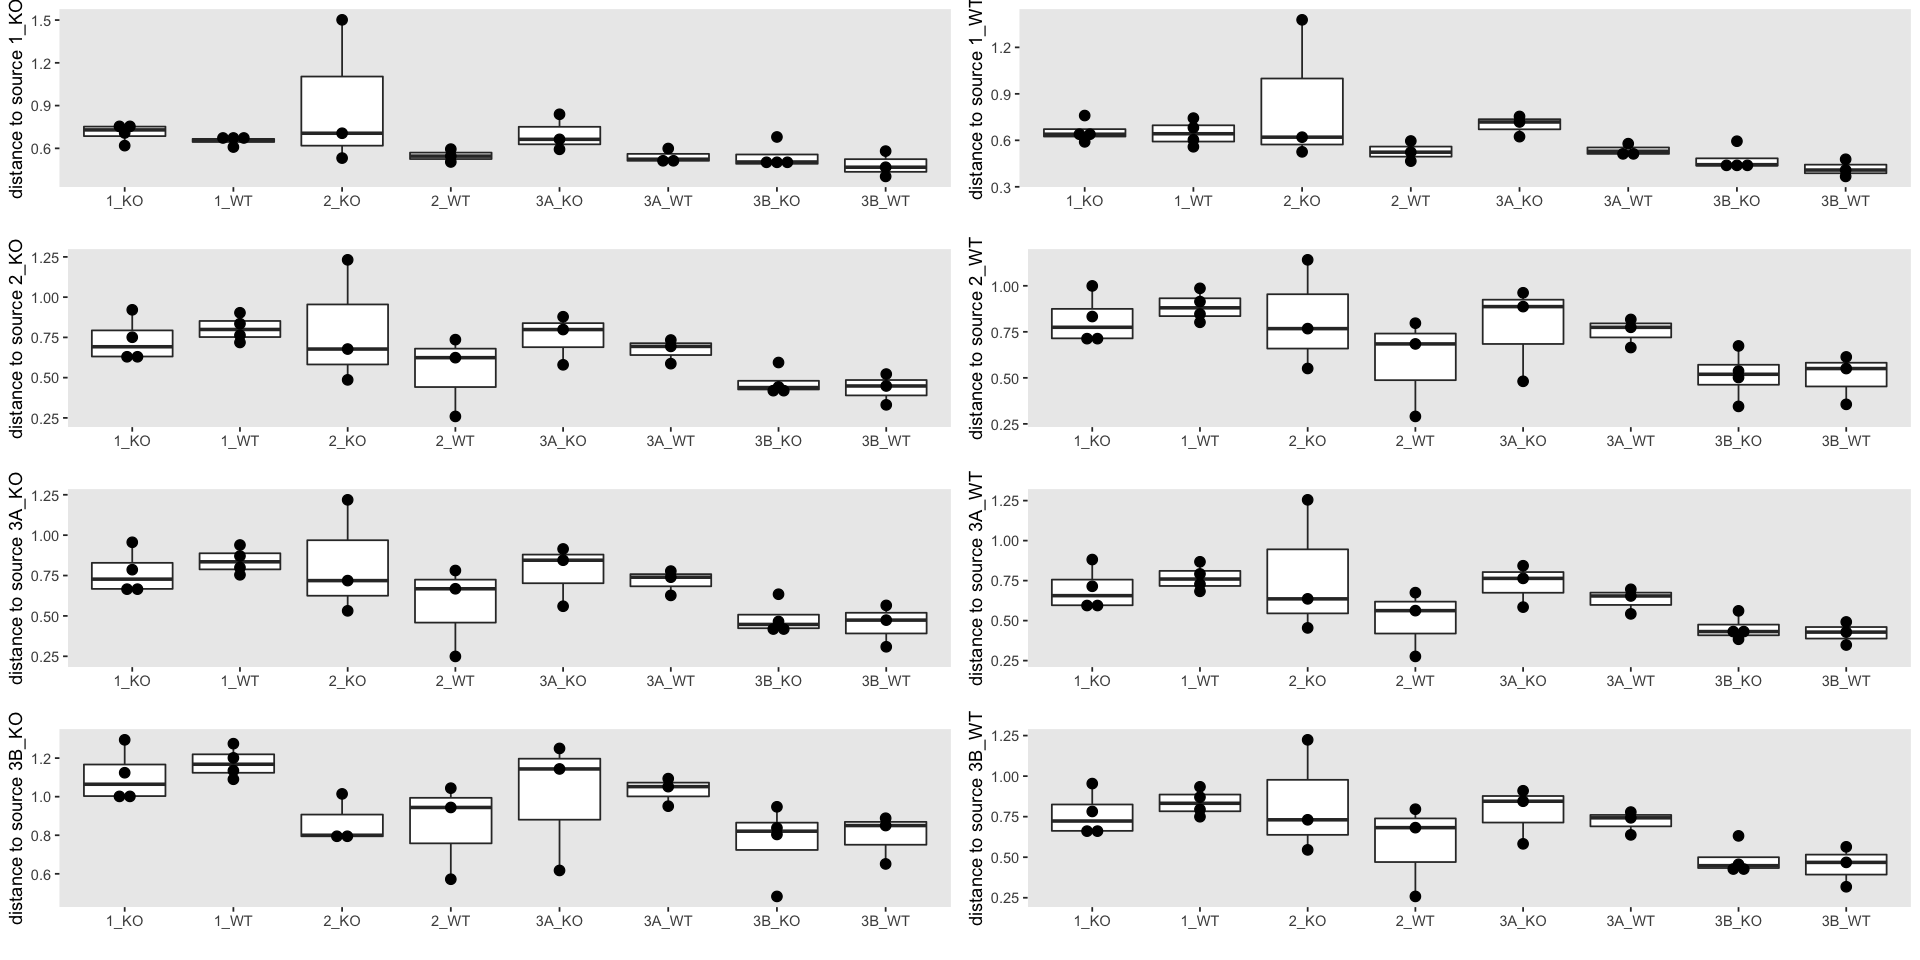

In [13]:
options(repr.plot.width=16, repr.plot.height=8)

iko <- ggplot(I_KOw, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to source 1_KO") +
  theme(legend.position="none", panel.grid=element_blank())

iwt <- ggplot(I_WTw, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to source 1_WT") +
  theme(legend.position="none", panel.grid=element_blank())

iiko <- ggplot(II_KOw, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to source 2_KO") +
  theme(legend.position="none", panel.grid=element_blank())

iiwt <- ggplot(II_WTw, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to source 2_WT") +
  theme(legend.position="none", panel.grid=element_blank())

iiiako <- ggplot(IIIA_KOw, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to source 3A_KO") +
  theme(legend.position="none", panel.grid=element_blank())

iiiawt <- ggplot(IIIA_WTw, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to source 3A_WT") +
  theme(legend.position="none", panel.grid=element_blank())

iiibko <- ggplot(IIIB_KOw, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to source 3B_KO") +
  theme(legend.position="none", panel.grid=element_blank())

iiibwt <- ggplot(IIIB_WTw, aes(x=FMT_batch_type, y=value)) +
  geom_boxplot() +
  geom_dotplot(binaxis = 'y', stackdir = 'center', dotsize=2) +
  labs(x="", y="distance to source 3B_WT") +
  theme(legend.position="none", panel.grid=element_blank())

plt_wuni_similarity <- ggarrange(iko, iwt, iiko, iiwt, iiiako, iiiawt, iiibko, iiibwt,
                            ncol = 2, nrow = 4)
plt_wuni_similarity


#png(filename = "/Users/dagmarschierova/MEGA/IMG/study_5_revisions/Figures/wuni_similarity.png", 
#    res=300, width=8000, height=4000, bg="transparent")
#plot(plt_wuni_similarity)
#dev.off()